# 온라인 쇼핑 판매액
지난해 연간 온라인 쇼핑 판매액이 18% 증가했습니다.

이 분석을 한 뒤에 구매액도 분석해보면 좋을 것 같습니다.

어떤 국가로 어떤 판매전략을 세우면 좋을 지 분석해보겠습니다.

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline
if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")

df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액.csv", encoding = "cp949")
df_raw.shape
df_raw[df_raw["국가(대륙)별"] == "미국"]
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014.1/4', '2014.2/4', '2014.3/4',
       '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4',
       '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4',
       '2019.2/4', '2019.3/4', '2019.4/4'],
      dtype='object')

# tidy data 만들기
## melt 함수 
컬럼에 있는 데이터를 행으로 보내는 것


In [59]:
df = df_raw.melt(id_vars=["국가(대륙)별","상품군별",'판매유형별'], var_name="기간", value_name="백만원")
df.shape

(10800, 5)

In [60]:
#df.info() 찍어보면 가격도 object 유형이고 기간도 object로 들어있다.
# 그래서 데이터 전처리를 통해서 분리해준다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


# 데이터 전처리
## 1. 기간에서 분리하기
- 기간에서 연도를 분리하기
- 기간에서 분기만 분리하기
- 분기 컬럼 만들기

## 2. 금액을 수치데이터로 만들기
- 문자를 결측치로 변경하고 float 타입으로 변경한다.

## 3. 필요없는 데이터 제거하기


In [61]:
# 기간에서 연도 분리하기
# js의 callback 함수가 lambda같은 느낌 x가 기간 한개씩 들어간갑
df["연도"] = df["기간"].map(lambda x : int(x.split(".")[0])) 
df["분기"] = df["기간"].map(lambda x : int(x.split(".")[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272,2014,1
1,합계,합계,면세점,2014.1/4,-,2014,1
2,합계,합계,면세점 이외,2014.1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014,1


In [62]:
# 문자를 결측치로 변경하고 float 타입으로 변경한다.
# 결측치 -> numpy의 nan으로 바꾸기 pd.np.nan
# astype(float) -> 열 문자의 타입을 바꾼다.
# float으로 바꾼이유는 NaN이 float 타입이기 때문에
df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)

/var/folders/zg/0z31f_k95m70zvvx2_jbx91w0000gn/T/ipykernel_91832/969578059.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)


In [63]:
# 합계 데이터는 따로 구할 수 있기때문에 전체데이터에서 제거한다.
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# K-Beauty 시각화
## 전체 상품군 판매액
- 판매유형별 데이터는 일부기간에는 "계"가 존재하기 때문에 판매유형이 계인 데이터만 가져와서 봐야지 평균 값을 구하는 그래프에서 올바른 값을 표현할 수 있다.

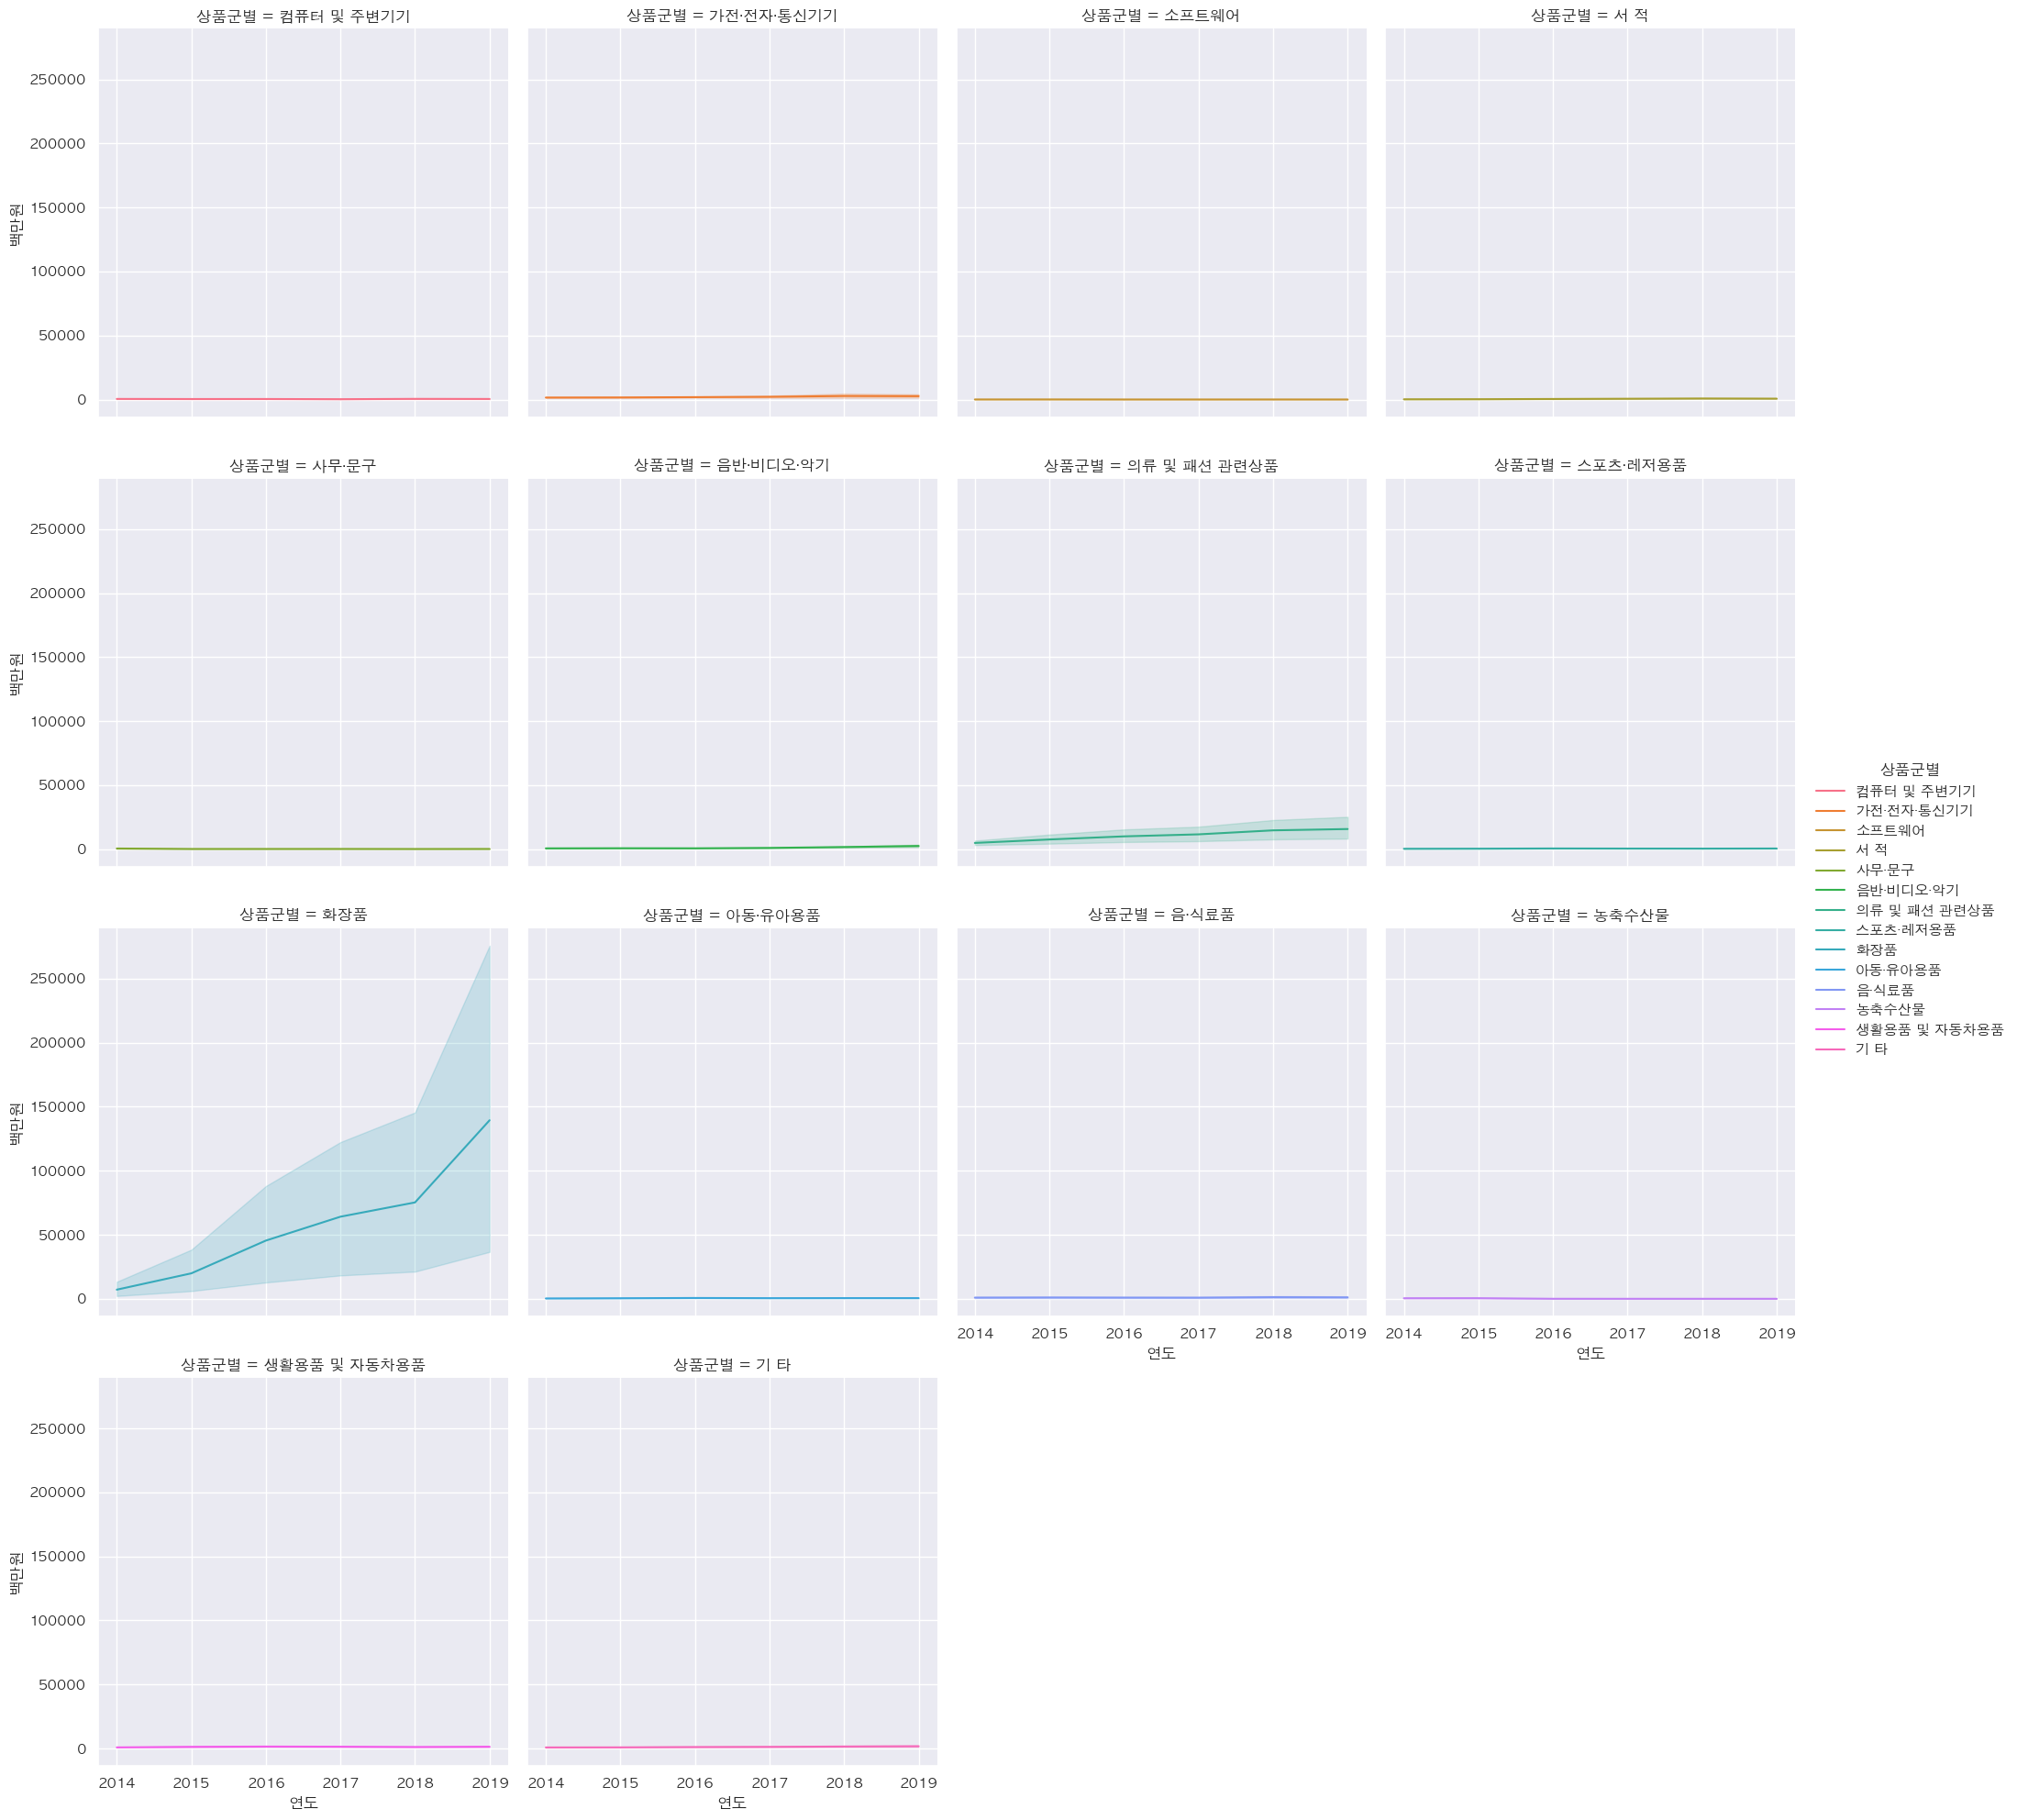

In [69]:
df_total = df[df["판매유형별"] == "계"].copy()
df_total
#연도, 판매액으로 Lineplot을 그리기
sns.lineplot(data = df_total, x="연도", y="백만원")

#상품군별로 다른 색상으로 표시하기
#Plt.legend -> 상품군별 표시 박스 밖에 표시하는 것
sns.lineplot(data = df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 상품군별 아래 있는 상품군을 확인하기 힘들다, 그때 relplot 이용한다.
# kined= "line" -> lineplot과 완전 똑같이 그리게 하는 옵션이다.
# col="상품군별"  -> 
# col_wrap = 4 => subplot 한줄에 몇개 그래프 나오게 할지
sns.relplot(data = df_total,  x="연도", y="백만원", hue="상품군별", kind= "line", col="상품군별",col_wrap = 4)

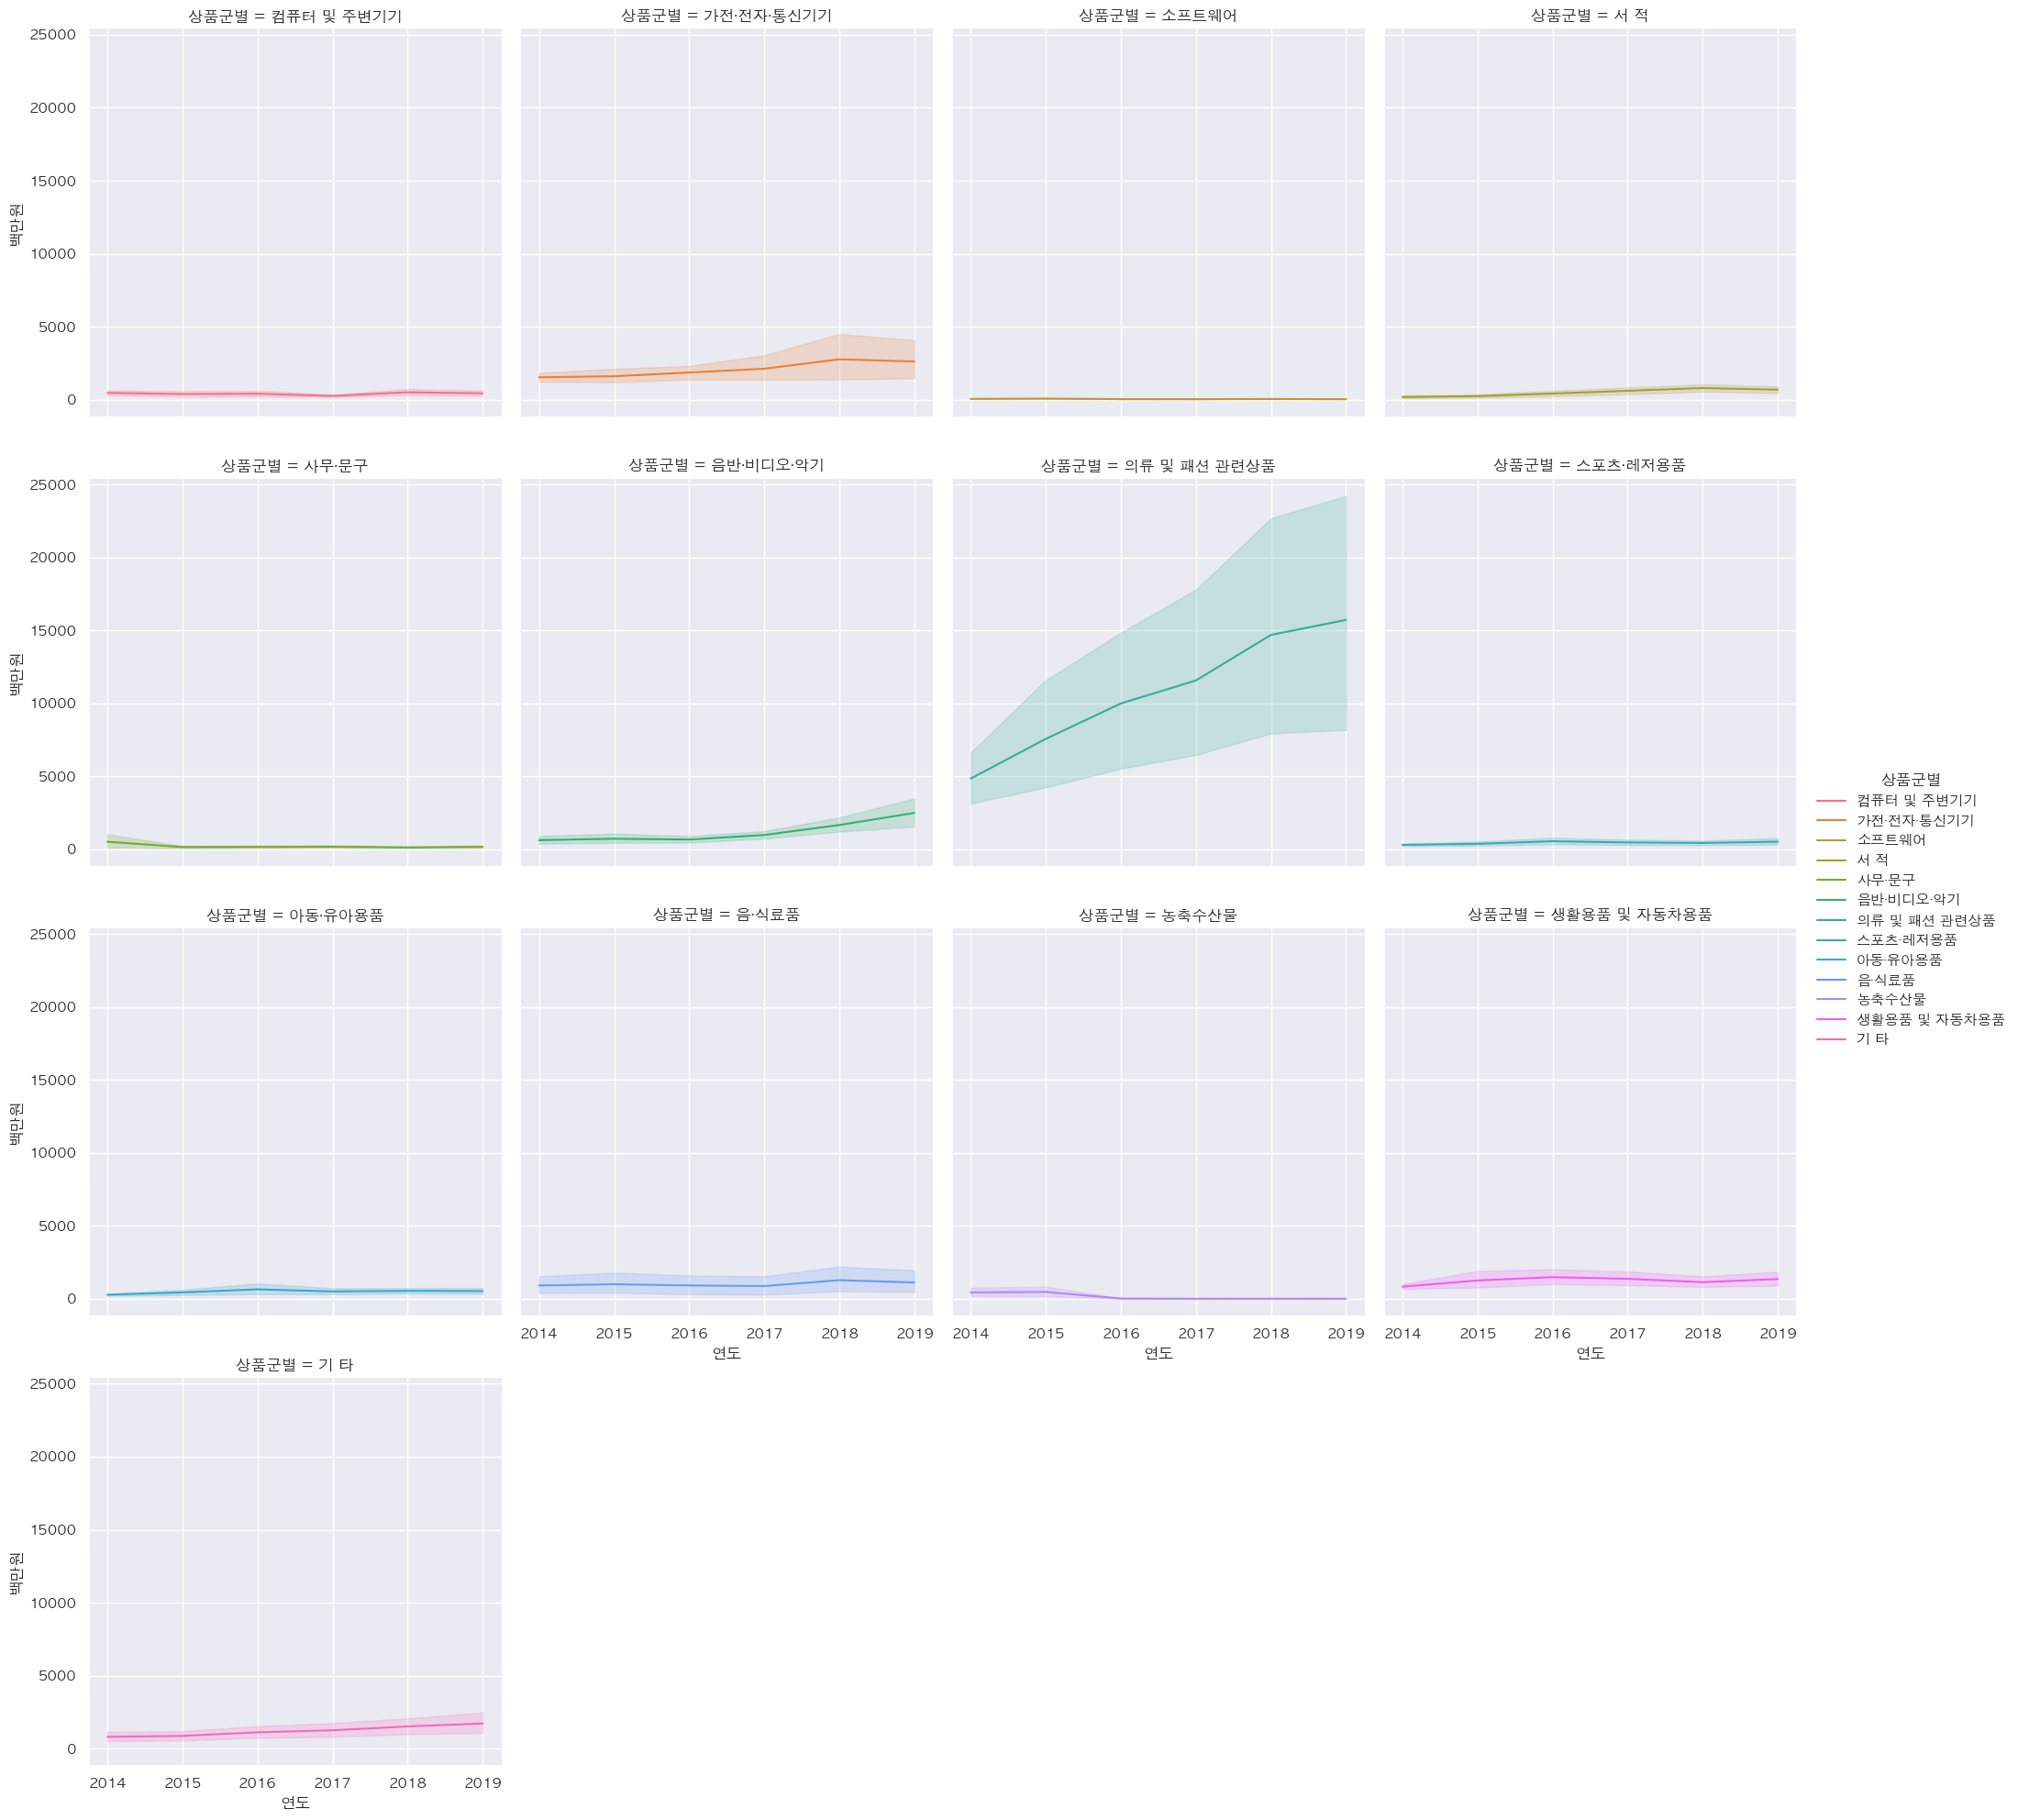

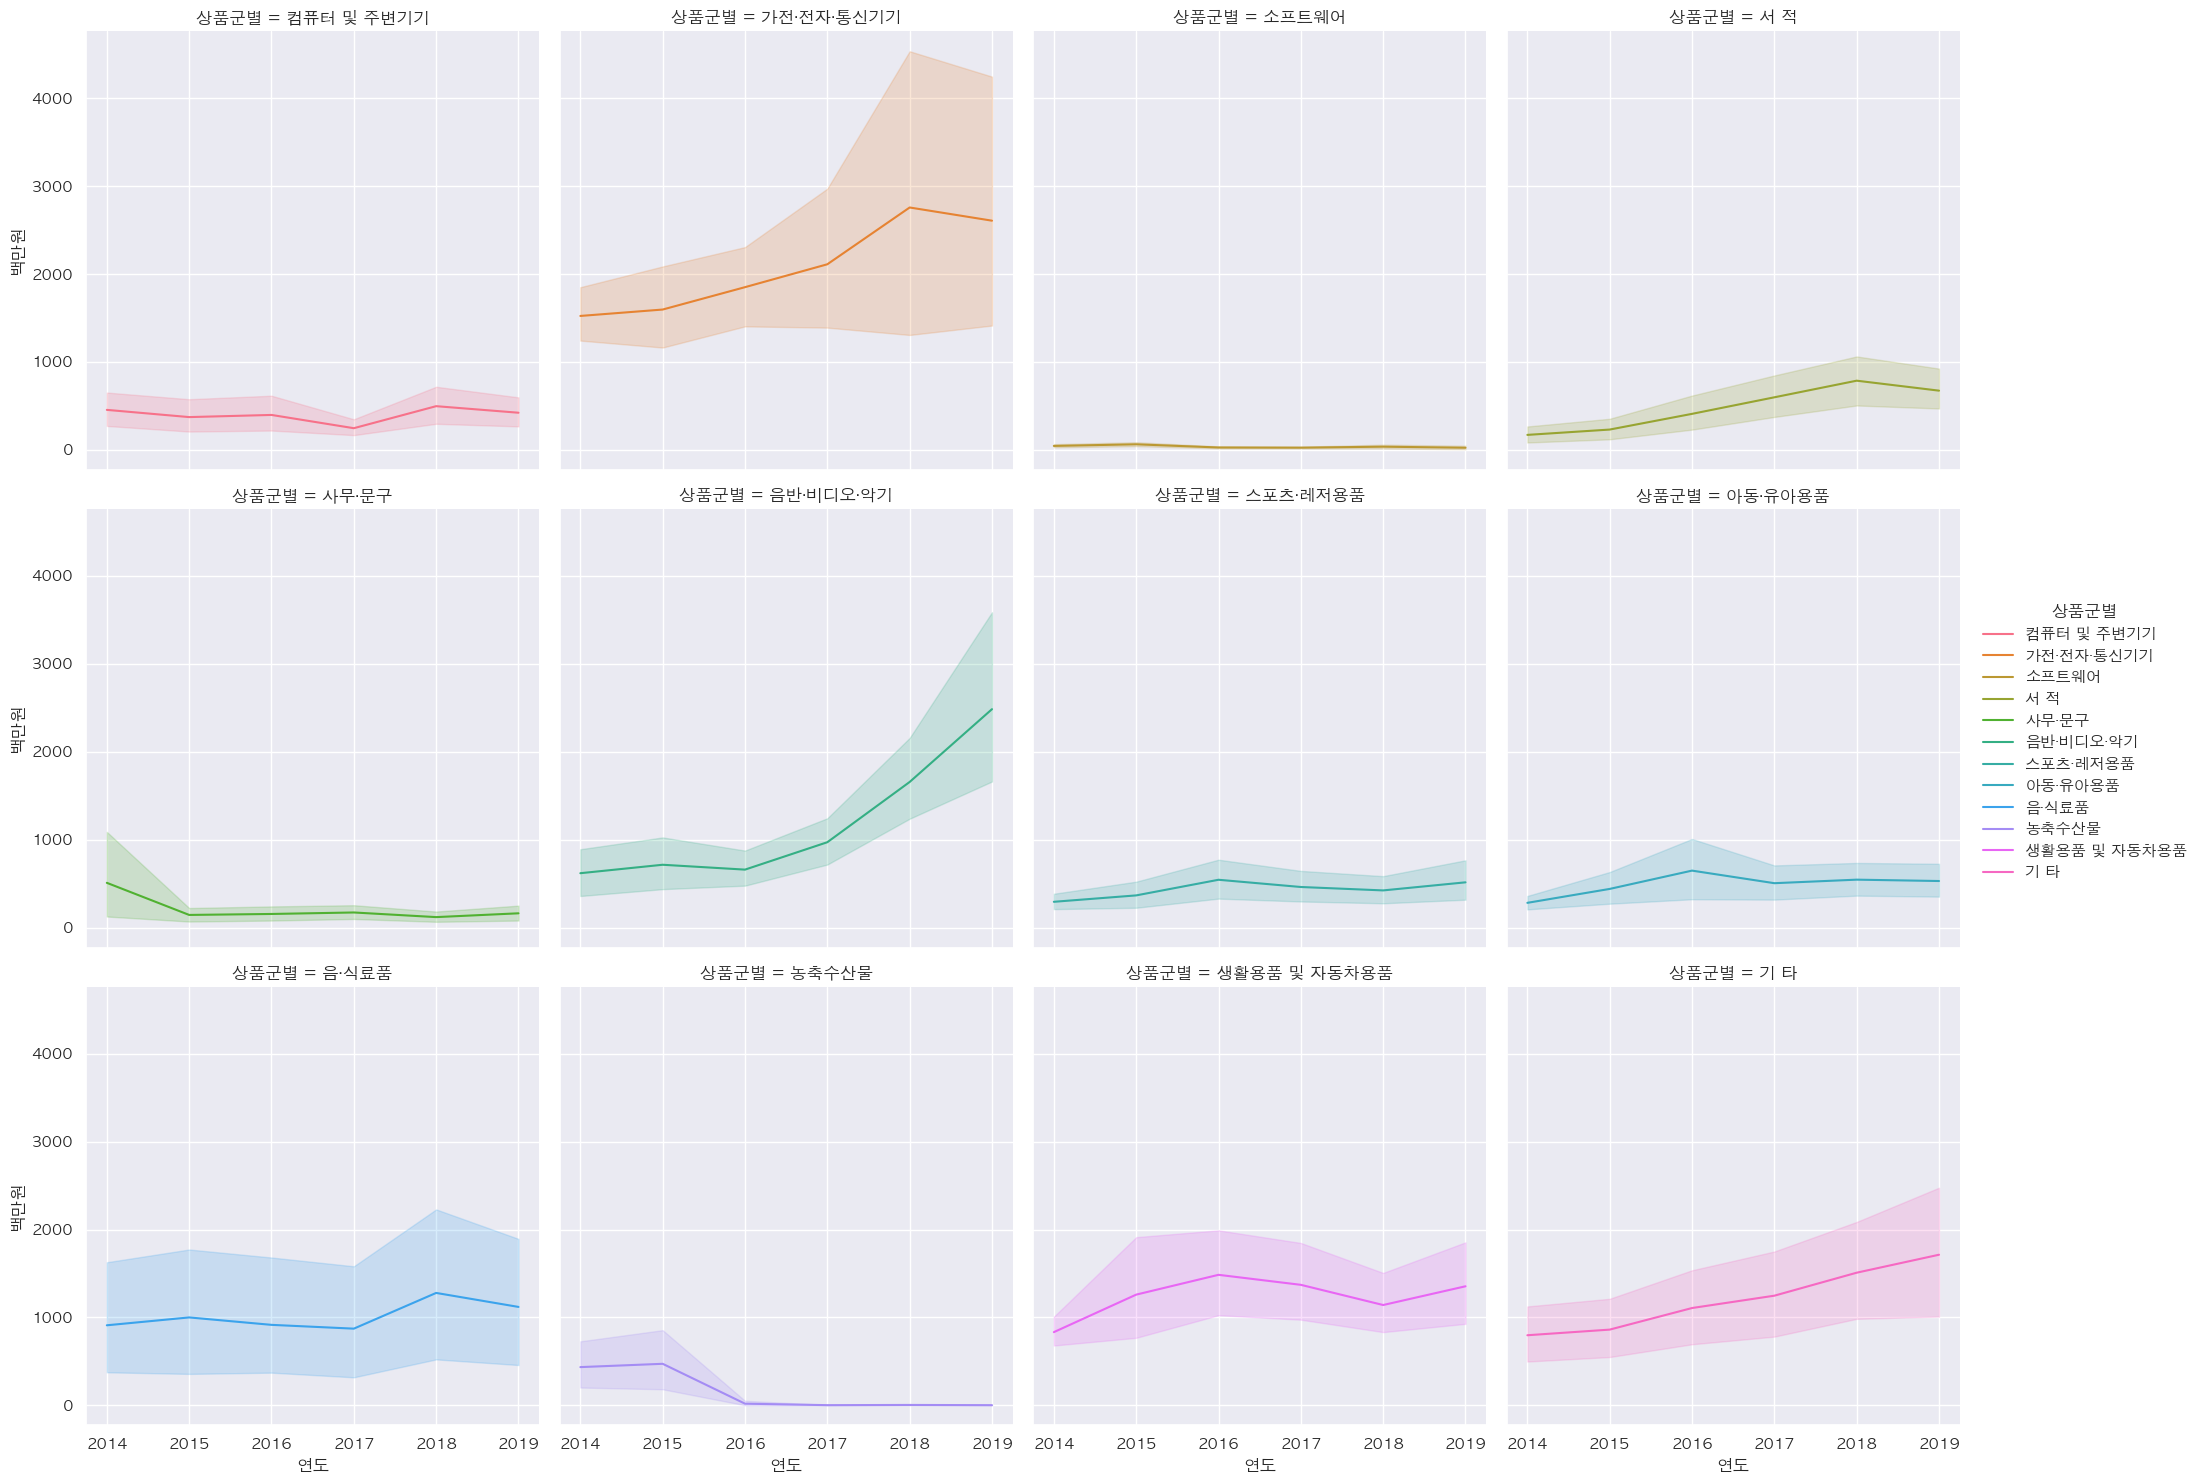

In [73]:
# 화장품이 너무 변화가 커서 다른것 보기가 어렵다. 그래서 화장품만 빼고 한번 봐보자
df_sub = df_total[~df_total["상품군별"].isin(["화장품"])].copy()
sns.relplot(data=df_sub, x="연도", y="백만원", hue="상품군별", col="상품군별", col_wrap=4, kind="line")


df_sub2 = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션 관련상품"])].copy()
sns.relplot(data=df_sub2, x="연도", y="백만원", hue="상품군별", col="상품군별", col_wrap=4, kind="line")

## 화장품의 온라인쇼핑 해외 직접 판매액



<AxesSubplot:xlabel='기간', ylabel='백만원'>

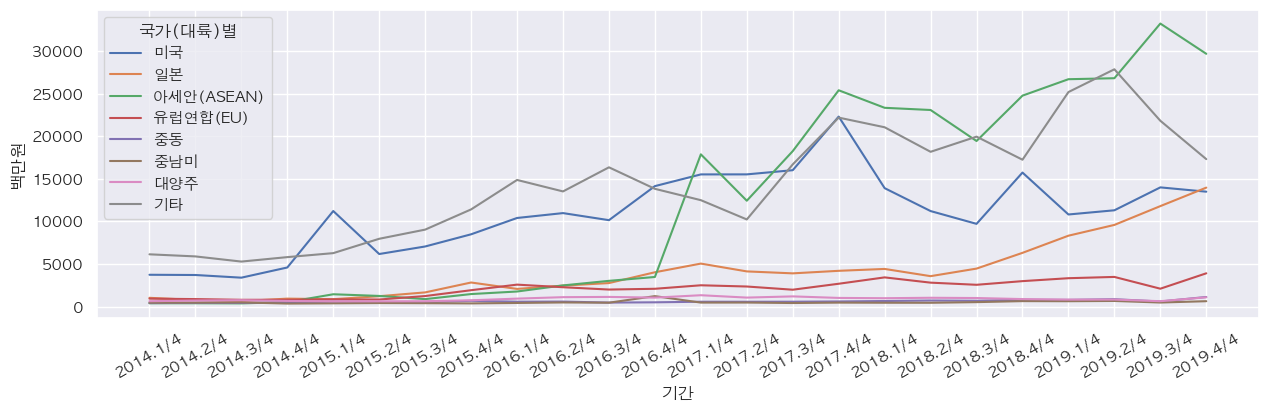

In [83]:
#.copy()를 명시적으로 써주지 않으면 나중에 df_cosmetic을 변경했을때 df_total 값이 바뀔수도 있따.
df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()

plt.figure(figsize=(15,4))
#sns.lineplot(data = df_cosmetic, x="연도", y="백만원", hue="분기")

# 화장품 판매액에 대한 기간별 금액 데이터 시각화
# 얼마나 글씨를 기울릴지의 옵션
plt.xticks(rotation = 30)
#sns.lineplot(data = df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

#중국빼고 시각화
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x="기간", y="백만원", hue="국가(대륙)별")

## 의류 및 패션 관련 상품의 판매액 시각화



/var/folders/zg/0z31f_k95m70zvvx2_jbx91w0000gn/T/ipykernel_91832/1343046874.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)


<AxesSubplot:xlabel='기간', ylabel='백만원'>

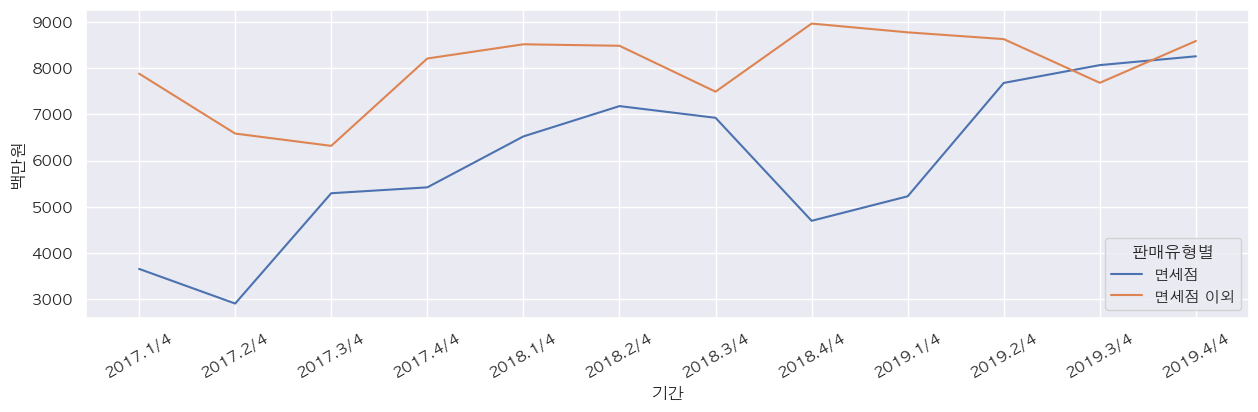

In [91]:
df_fashion = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] == "계")].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
#sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] != "계")].copy()
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)


## 데이터 pivot table로 집계하고 heatmap 으로 표현하기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

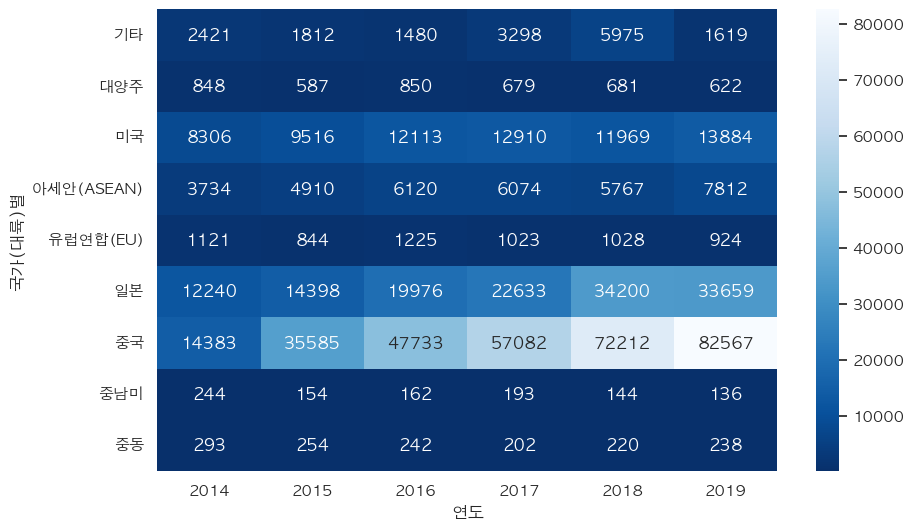

In [99]:
# 피봇 테이블로 "국가(대륙)별", "연도" 별 합계 금액을 표 형태로 구하기
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap = "Blues_r",annot=True,  fmt=".0f")

## 전체 상품군별로 온라인 쇼핑 해외직접판매액은 증가했을까? - 전체상품군별 시각화


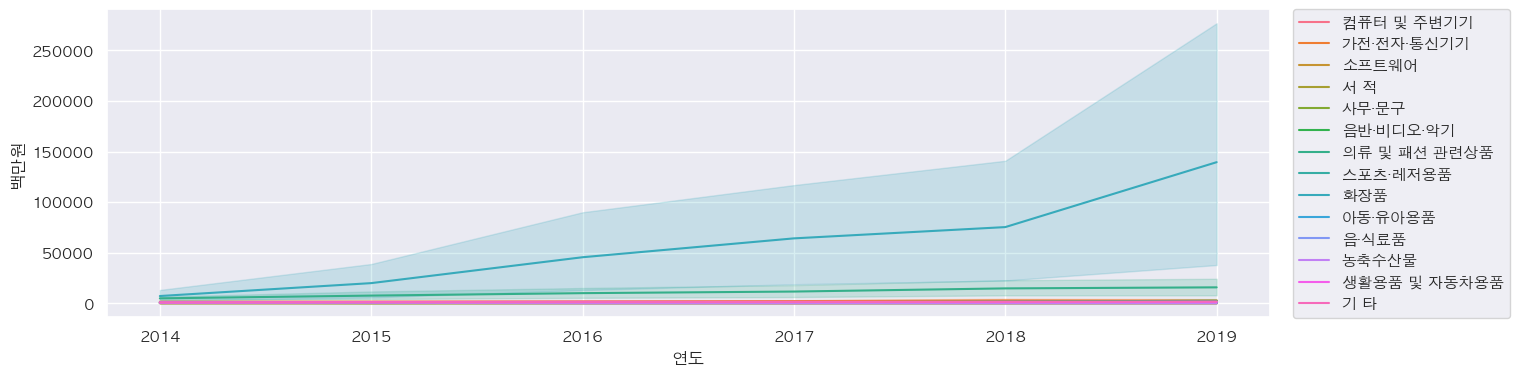

In [102]:
#sns.barplot(data=df_total, x="연도", y="백만원")

plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0,)